# Introduction à l'apprentissage machine


## Apprentissage Supervisé vs Apprentissage Non Supervisé

- **Apprentissage Supervisé** : Le modèle est entraîné sur des données étiquetées, c’est-à-dire avec des réponses connues (comme des catégories ou des valeurs). Par exemple, pour classifier des œuvres d’art par style, on utilise des exemples d'œuvres étiquetées pour apprendre au modèle les caractéristiques de chaque style.
- **Apprentissage Non Supervisé** : Le modèle est entraîné sans réponses connues. Ici, il doit trouver lui-même des patterns dans les données. Par exemple, identifier des groupes de mots fréquents dans un corpus de textes sans spécifier ce que ces groupes représentent.


## Classification vs Régression

- **Classification** : Le modèle apprend à attribuer des catégories ou classes aux données. Par exemple, déterminer si un texte est de type « fiction » ou « essai ».
- **Régression** : Le modèle apprend à prédire des valeurs continues. Par exemple, prédire la date approximative d’un texte basé sur des caractéristiques linguistiques.



![Overfitting](https://github.com/crazyjeannot/Python4DH---2024/raw/main/data/img/overfitting.png)

::## Surentraînement vs Sous-entraînement

Le **sous-entraînement** survient lorsque le modèle n’est pas suffisamment complexe pour capturer les patterns des données ; il fait des approximations trop simplifiées et ne parvient pas à bien représenter les relations sous-jacentes. Cela se traduit par des erreurs élevées aussi bien sur les données d'entraînement que sur les données de test, indiquant que le modèle n’a pas appris les caractéristiques essentielles du jeu de données.

À l’opposé, le **surentraînement** (ou overfitting) se produit lorsque le modèle est trop complexe et s’adapte excessivement aux données d'entraînement, capturant même les moindres variations et le bruit. Bien que le modèle ait une faible erreur sur les données d’entraînement, il performe mal sur les nouvelles données car il a appris des détails spécifiques qui ne se généralisent pas. Un bon modèle doit trouver un équilibre entre ces deux extrêmes, en capturant les tendances générales sans se surajuster aux détails.

![Regularization](https://github.com/crazyjeannot/Python4DH---2024/raw/main/data/img/regularization.png)


## Mémoriser vs Généraliser

- **Mémoriser** : Un modèle peut « mémoriser » des exemples spécifiques vus lors de l’apprentissage, mais cela signifie qu’il risque de ne pas bien fonctionner sur de nouveaux exemples. Cela limite l’utilité de notre modèle dans des situations réelles.
- **Généraliser** : Un bon modèle généralise, c’est-à-dire qu’il peut appliquer ce qu’il a appris à de nouveaux exemples qu'il n’a jamais vus. En d’autres termes, il n’est pas figé sur les données d’apprentissage, mais a extrait des patterns pertinents qui s’appliquent aussi à de nouveaux cas.



![Bias-Variance Tradeoff](https://github.com/crazyjeannot/Python4DH---2024/raw/main/data/img/biais_variance.png)


## Objectif Principal du Machine Learning

L’objectif principal du Machine Learning est d'extraire les patterns qui permettent de généraliser à partir de la **matrice de données** (X) pour en déduire une structure capable de prédire ou d’estimer une cible **Y** (par exemple, le genre d’un texte, l’époque d’un document, etc.).

In [ ]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_main = pd.read_csv('MAIN_CANON_1000.csv')

In [5]:
df_main.set_index("index", inplace = True)
df_main = df_main.replace(np.nan, 0)

In [6]:
df_main

,le,de,un,et,il,avoir,à,lui,être,son,...,arrêté,chair,lueur,glace,colonel,île,énorme,pont,paysan,canon
index,,,,,,,,,,,,,,,,,,,,,
1811_Chateaubriand-François-Rene-de_Oeuvres-completes,0.073227,0.074235,0.025755,0.025387,0.013422,0.017301,0.019712,0.005607,0.013674,0.007144,...,0.000098,0.000037,0.000037,0.000006,0.000000,0.000603,0.000012,0.000197,0.000111,canon
1812_Kock-Paul-de_L-enfant-de-ma-femme,0.062699,0.056479,0.019378,0.022654,0.023758,0.017336,0.021955,0.016471,0.015771,0.020575,...,0.000184,0.000000,0.000000,0.000037,0.004012,0.000000,0.000000,0.000000,0.000221,non_canon
1815_Gay-Sophie_Anatole_Vol-1,0.074455,0.083807,0.022538,0.018506,0.013186,0.017548,0.018176,0.023397,0.012062,0.018407,...,0.000033,0.000000,0.000033,0.000000,0.000000,0.000000,0.000033,0.000000,0.000000,non_canon
1815_Gay-Sophie_Anatole_Vol-2,0.078353,0.088045,0.019131,0.018089,0.013038,0.015721,0.020109,0.022982,0.011428,0.022508,...,0.000063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0.000000,non_canon
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-2),0.058306,0.054293,0.020645,0.019710,0.027627,0.021772,0.021305,0.020205,0.014102,0.017209,...,0.000165,0.000000,0.000000,0.000027,0.000000,0.000000,0.000000,0.000027,0.000330,non_canon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018_Murail-Marie-Aude_En-nous-beaucoup-d-hommes-respirent,0.051458,0.049526,0.030394,0.015645,0.013524,0.028015,0.019603,0.011710,0.018708,0.011050,...,0.000118,0.000094,0.000000,0.000047,0.000024,0.000024,0.000071,0.000024,0.000047,non_canon
2019_Murail-Marie-Aude_Sauveur-Fils_5,0.051614,0.045202,0.032226,0.015588,0.017859,0.026201,0.018028,0.018616,0.018229,0.016684,...,0.000108,0.000077,0.000031,0.000000,0.000000,0.000077,0.000046,0.000000,0.000000,non_canon
2019_Dabos-Christelle_La-Passe-miroir_4-La-Tempete-des-echos,0.055526,0.051064,0.030821,0.012880,0.015859,0.022457,0.023109,0.028765,0.011027,0.020143,...,0.000040,0.000165,0.000079,0.000218,0.000000,0.000073,0.000105,0.000059,0.000040,non_canon


In [7]:
df_main.canon.value_counts(normalize=True)

canon
non_canon    0.603716
canon        0.396284
Name: proportion, dtype: float64


## Modélisation Descriptive vs Modélisation Prédictive

- **Modélisation Descriptive** : Cherche à comprendre et résumer les informations contenues dans les données. Par exemple, on peut utiliser des modèles descriptifs pour analyser des tendances historiques ou identifier des groupes similaires dans les données.
- **Modélisation Prédictive** : Utilise des patterns présents dans les données pour faire des prédictions sur de nouvelles données. Par exemple, à partir des caractéristiques de textes littéraires, prédire l'auteur probable d'un texte non attribué.


In [8]:
def dated(df):
    df_res = df.copy()
    list_date = []
    for elem in df_res.index:
        list_date.append(int(elem.split('_')[0]))
    df_res['date'] = list_date
    return df_res

In [9]:
list(df_main.index)[0].split('_')[0]

'1811'

In [10]:
df_dated = dated(df_main)

In [11]:
df_dated

,le,de,un,et,il,avoir,à,lui,être,son,...,chair,lueur,glace,colonel,île,énorme,pont,paysan,canon,date
index,,,,,,,,,,,,,,,,,,,,,
1811_Chateaubriand-François-Rene-de_Oeuvres-completes,0.073227,0.074235,0.025755,0.025387,0.013422,0.017301,0.019712,0.005607,0.013674,0.007144,...,0.000037,0.000037,0.000006,0.000000,0.000603,0.000012,0.000197,0.000111,canon,1811
1812_Kock-Paul-de_L-enfant-de-ma-femme,0.062699,0.056479,0.019378,0.022654,0.023758,0.017336,0.021955,0.016471,0.015771,0.020575,...,0.000000,0.000000,0.000037,0.004012,0.000000,0.000000,0.000000,0.000221,non_canon,1812
1815_Gay-Sophie_Anatole_Vol-1,0.074455,0.083807,0.022538,0.018506,0.013186,0.017548,0.018176,0.023397,0.012062,0.018407,...,0.000000,0.000033,0.000000,0.000000,0.000000,0.000033,0.000000,0.000000,non_canon,1815
1815_Gay-Sophie_Anatole_Vol-2,0.078353,0.088045,0.019131,0.018089,0.013038,0.015721,0.020109,0.022982,0.011428,0.022508,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0.000000,non_canon,1815
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-2),0.058306,0.054293,0.020645,0.019710,0.027627,0.021772,0.021305,0.020205,0.014102,0.017209,...,0.000000,0.000000,0.000027,0.000000,0.000000,0.000000,0.000027,0.000330,non_canon,1816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018_Murail-Marie-Aude_En-nous-beaucoup-d-hommes-respirent,0.051458,0.049526,0.030394,0.015645,0.013524,0.028015,0.019603,0.011710,0.018708,0.011050,...,0.000094,0.000000,0.000047,0.000024,0.000024,0.000071,0.000024,0.000047,non_canon,2018
2019_Murail-Marie-Aude_Sauveur-Fils_5,0.051614,0.045202,0.032226,0.015588,0.017859,0.026201,0.018028,0.018616,0.018229,0.016684,...,0.000077,0.000031,0.000000,0.000000,0.000077,0.000046,0.000000,0.000000,non_canon,2019
2019_Dabos-Christelle_La-Passe-miroir_4-La-Tempete-des-echos,0.055526,0.051064,0.030821,0.012880,0.015859,0.022457,0.023109,0.028765,0.011027,0.020143,...,0.000165,0.000079,0.000218,0.000000,0.000073,0.000105,0.000059,0.000040,non_canon,2019


In [12]:
def plot_decade_counts(df):
    # Create a new column for decades
    df['decade'] = (df['date'].values // 10) * 10

    # Group by decade and count 'canon' values
    decade_counts = df.groupby(['decade', 'canon']).size().unstack(fill_value=0)
    decade_counts.drop(2020, axis=0, inplace=True)

    fig, ax = plt.subplots(figsize=(30,15))
    decade_counts.plot(kind='bar', stacked=True, ax=ax, color=['r','b'])

    plt.xlabel('Decades', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.ylabel('Number of novels', fontsize=30)
    plt.legend(labels=['canon', 'corpus'], prop={'size': 30})

    plt.show()

    return decade_counts

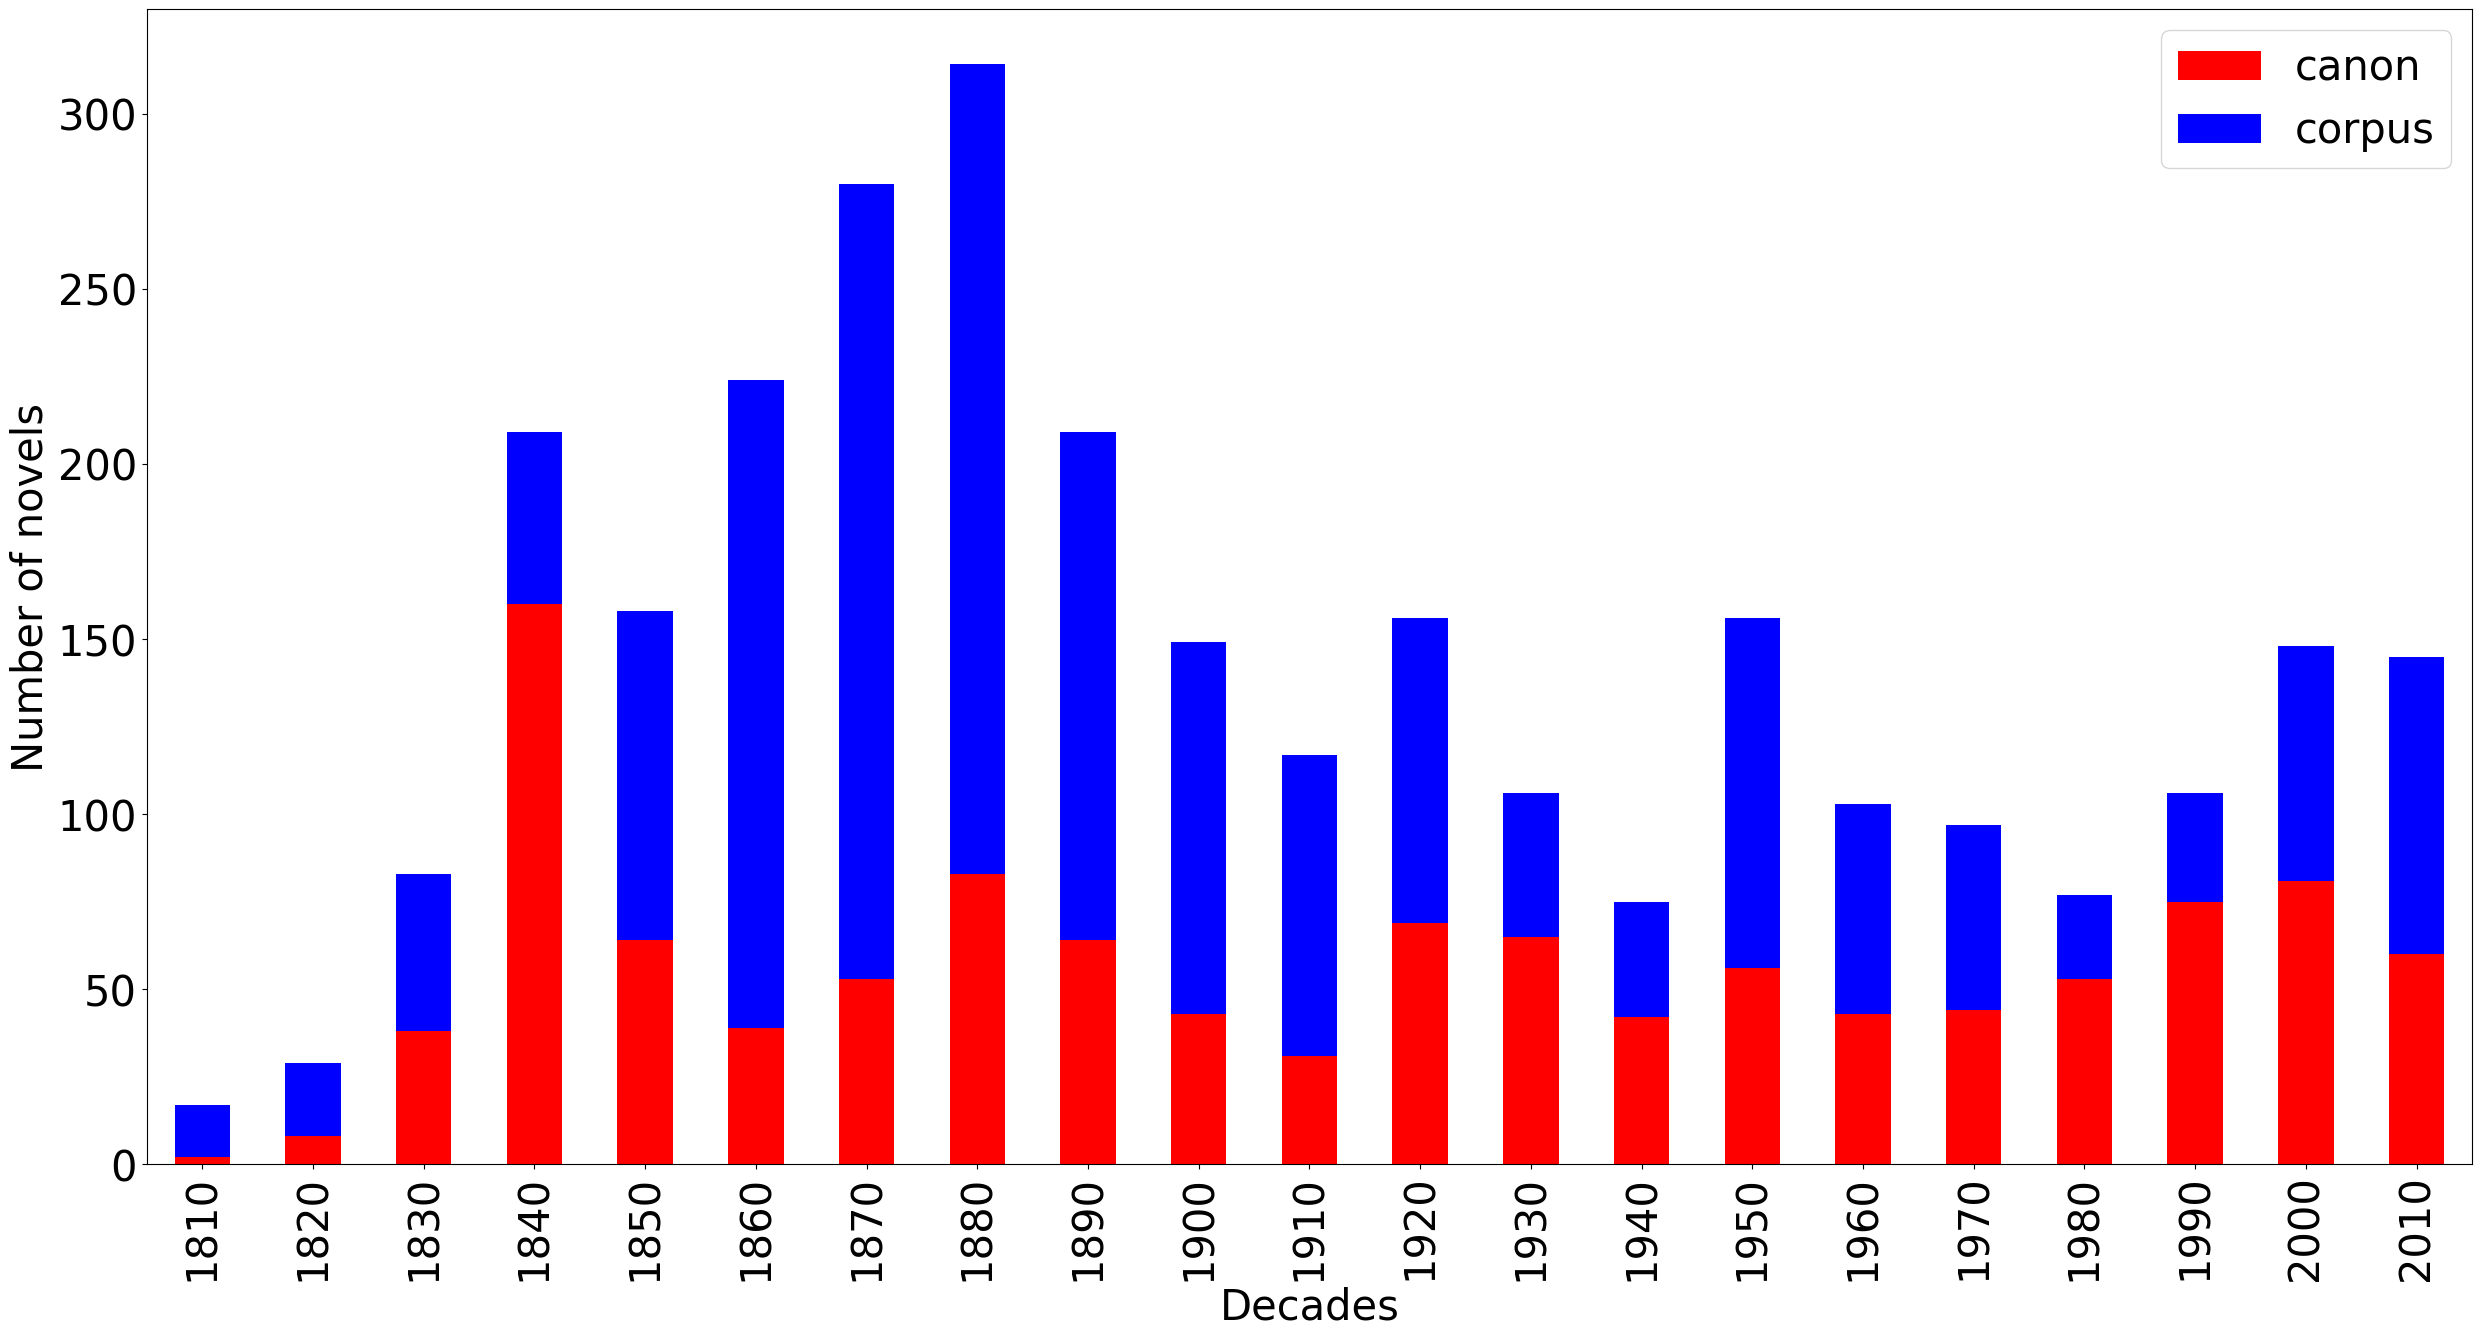

In [13]:
decade_counts_authors = plot_decade_counts(df_dated)

## Données de Test vs Données d'Entraînement

- **Données d’Entraînement** : Utilisées pour apprendre le modèle. Le modèle s’entraîne sur ces données pour comprendre les patterns.
- **Données de Test** : Utilisées pour évaluer la performance du modèle. Ce sont des données jamais vues pendant l’entraînement, permettant de tester la capacité du modèle à généraliser.


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_main.drop('canon', axis=1), df_main['canon'], test_size=0.2, random_state=42)

In [16]:
y_test

index
1934_Vercel-Roger_Capitaine-Conan                                                                          non_canon
1910_Cim-Albert_Le-petit-Leveille                                                                          non_canon
1873_Rousset-Alexis_Derailles-et-declasses-Paris-et-la-province_Tome-2                                     non_canon
1941_Mac-Orlan-Pierre_L-Ancre-de-misericorde                                                                   canon
1936_Montherlant-Henry-de_Pitie-pour-les-femmes                                                                canon
                                                                                                             ...    
1875_Mirabeau-Marie-Le-Harivel-de-Gonneville_Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine    non_canon
1869_Carraud-Zulma-Tourangin-Mme_Les-Gouters-de-la-grand-mere                                              non_canon
1884_Guy-de-Maupassant_Au-soleil                          

In [17]:
2960-592

2368

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

![ml_map](https://assets.wikiwand.com/_next/image?url=https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Exam_pass_logistic_curve.svg/1100px-Exam_pass_logistic_curve.svg.png&w=750&q=70)


In [19]:
log_reg = LogisticRegression(class_weight='balanced')

In [20]:
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [21]:
y_pred_log_reg = log_reg.predict(X_test)

In [22]:
y_pred_log_reg

array(['canon', 'non_canon', 'non_canon', 'canon', 'non_canon',
       'non_canon', 'canon', 'non_canon', 'non_canon', 'canon', 'canon',
       'non_canon', 'canon', 'non_canon', 'canon', 'canon', 'non_canon',
       'canon', 'canon', 'non_canon', 'non_canon', 'canon', 'non_canon',
       'canon', 'canon', 'canon', 'non_canon', 'canon', 'canon',
       'non_canon', 'canon', 'non_canon', 'non_canon', 'non_canon',
       'canon', 'canon', 'canon', 'non_canon', 'non_canon', 'non_canon',
       'non_canon', 'canon', 'canon', 'canon', 'canon', 'canon',
       'non_canon', 'non_canon', 'canon', 'canon', 'canon', 'canon',
       'non_canon', 'non_canon', 'canon', 'canon', 'canon', 'non_canon',
       'canon', 'non_canon', 'canon', 'canon', 'non_canon', 'non_canon',
       'canon', 'non_canon', 'canon', 'canon', 'canon', 'non_canon',
       'non_canon', 'canon', 'non_canon', 'canon', 'canon', 'non_canon',
       'non_canon', 'canon', 'non_canon', 'canon', 'canon', 'non_canon',
       'non_cano

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay, classification_report

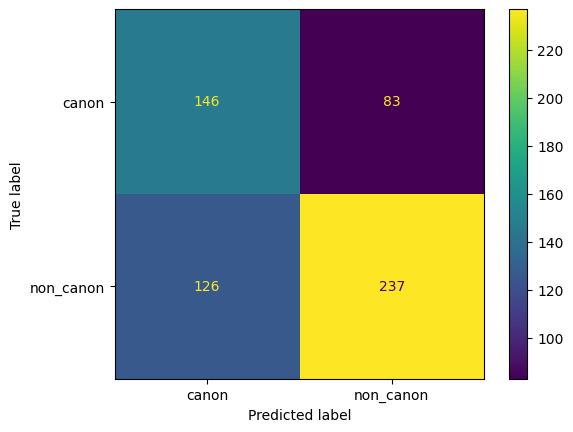

In [24]:
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg)

In [25]:
report = classification_report(y_test, y_pred_log_reg, output_dict=True)

In [26]:
df_scores = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])

In [27]:
df_scores


,precision,recall,f1-score,support
canon,0.536765,0.637555,0.582834,229.000000
non_canon,0.740625,0.652893,0.693997,363.000000
accuracy,0.646959,0.646959,0.646959,0.646959


In [28]:
y_test.value_counts(normalize=True)

canon
non_canon    0.613176
canon        0.386824
Name: proportion, dtype: float64

In [29]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

Logistic Regression Accuracy: 0.65


In [30]:
# À vous ! essayer d'optimiser les paramètres

![cross_validation](https://github.com/crazyjeannot/Python4DH---2024/raw/main/data/img/cross_validation.png)

In [40]:
# Define features and target variable
X = df_main.drop('canon', axis=1)
y = df_main['canon']

In [41]:
from sklearn.model_selection import cross_val_score
scores_log_reg = cross_val_score(log_reg, X, y, cv=5)

In [42]:
scores_log_reg

array([0.60810811, 0.73817568, 0.53378378, 0.61824324, 0.62668919])

![ml_map](https://github.com/crazyjeannot/Python4DH---2024/raw/main/data/img/ml_map.svg)

In [43]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(class_weight='balanced')

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.78


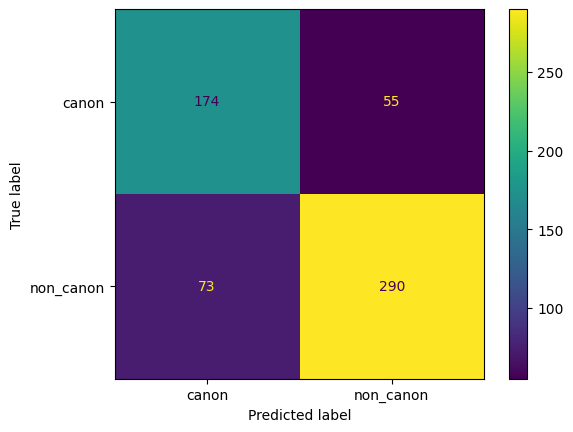

In [44]:
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm, output_dict=True)
df_scores = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])

In [45]:
df_scores

,precision,recall,f1-score,support
canon,0.704453,0.759825,0.731092,229.000000
non_canon,0.840580,0.798898,0.819209,363.000000
accuracy,0.783784,0.783784,0.783784,0.783784


In [46]:
scores_svm = cross_val_score(svm, X, y, cv=5)

In [47]:
scores_svm

array([0.64864865, 0.80405405, 0.69087838, 0.69594595, 0.51351351])

# Datation de corpus

In [ ]:
df_dated.drop(['canon'], axis=1, inplace=True)

In [63]:
type(list(df_dated.date)[0])

int

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [66]:
#df_dated['decade'] = (df_dated['date'].values // 10) * 10
#df_dated

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_dated.drop('date', axis=1), df_dated['date'], test_size=0.2, random_state=42)

In [68]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [69]:
y_train

index
2014_Mathieu-Nicolas_Aux-animaux-la-guerre         2014
1863_Capendu-Ernest_Marcof-Le-Malouin              1863
1902_Laurie-Andre_Memoires-d-un-collegien-russe    1902
1925_Genevoix-Maurice_Raboliot                     1925
2019_Murail-Marie-Aude_Sauveur-Fils_5              2019
                                                   ... 
1908_Veuzit-Max-du_Le-mystere-de-Malbackt          1908
1882_Fleuriot-Zenaide_Bouche-en-coeur              1882
1883_Monnier-Marc_Un-detraque                      1883
1888_Mirbeau-Octave_L-Abbe-Jules                   1888
1876_Feuillet-Octave_Histoire-de-Sibylle           1876
Name: date, Length: 2368, dtype: int64

In [70]:
predicted_year = regr.predict(X_test)

In [71]:
mean_absolute_error(y_test, predicted_year)

14.170315549747999

In [72]:
df_plot = pd.DataFrame({'predicted_year': predicted_year, 'real_year': y_test})

In [73]:
import seaborn as sns

<Axes: xlabel='real_year', ylabel='predicted_year'>

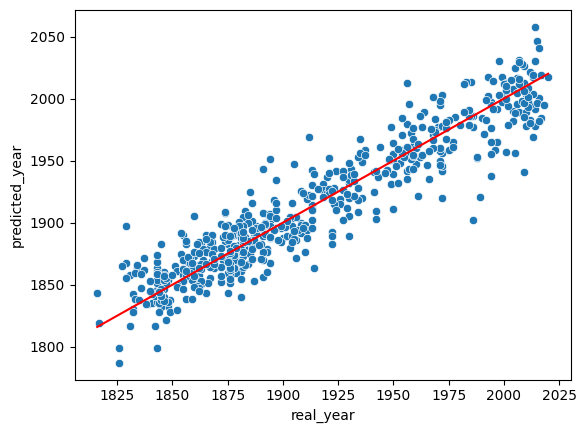

In [74]:
sns.scatterplot(data=df_plot, x='real_year', y='predicted_year')
sns.lineplot(data=df_plot, x='real_year', y='real_year', color='red')

In [75]:
df_plot['annees_erreur'] = abs(df_plot['real_year'] - df_plot['predicted_year'])

In [76]:
df_plot['decade'] = (df_plot['real_year'].values // 10) * 10

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '1810'),
  Text(1, 0, '1820'),
  Text(2, 0, '1830'),
  Text(3, 0, '1840'),
  Text(4, 0, '1850'),
  Text(5, 0, '1860'),
  Text(6, 0, '1870'),
  Text(7, 0, '1880'),
  Text(8, 0, '1890'),
  Text(9, 0, '1900'),
  Text(10, 0, '1910'),
  Text(11, 0, '1920'),
  Text(12, 0, '1930'),
  Text(13, 0, '1940'),
  Text(14, 0, '1950'),
  Text(15, 0, '1960'),
  Text(16, 0, '1970'),
  Text(17, 0, '1980'),
  Text(18, 0, '1990'),
  Text(19, 0, '2000'),
  Text(20, 0, '2010'),
  Text(21, 0, '2020')])

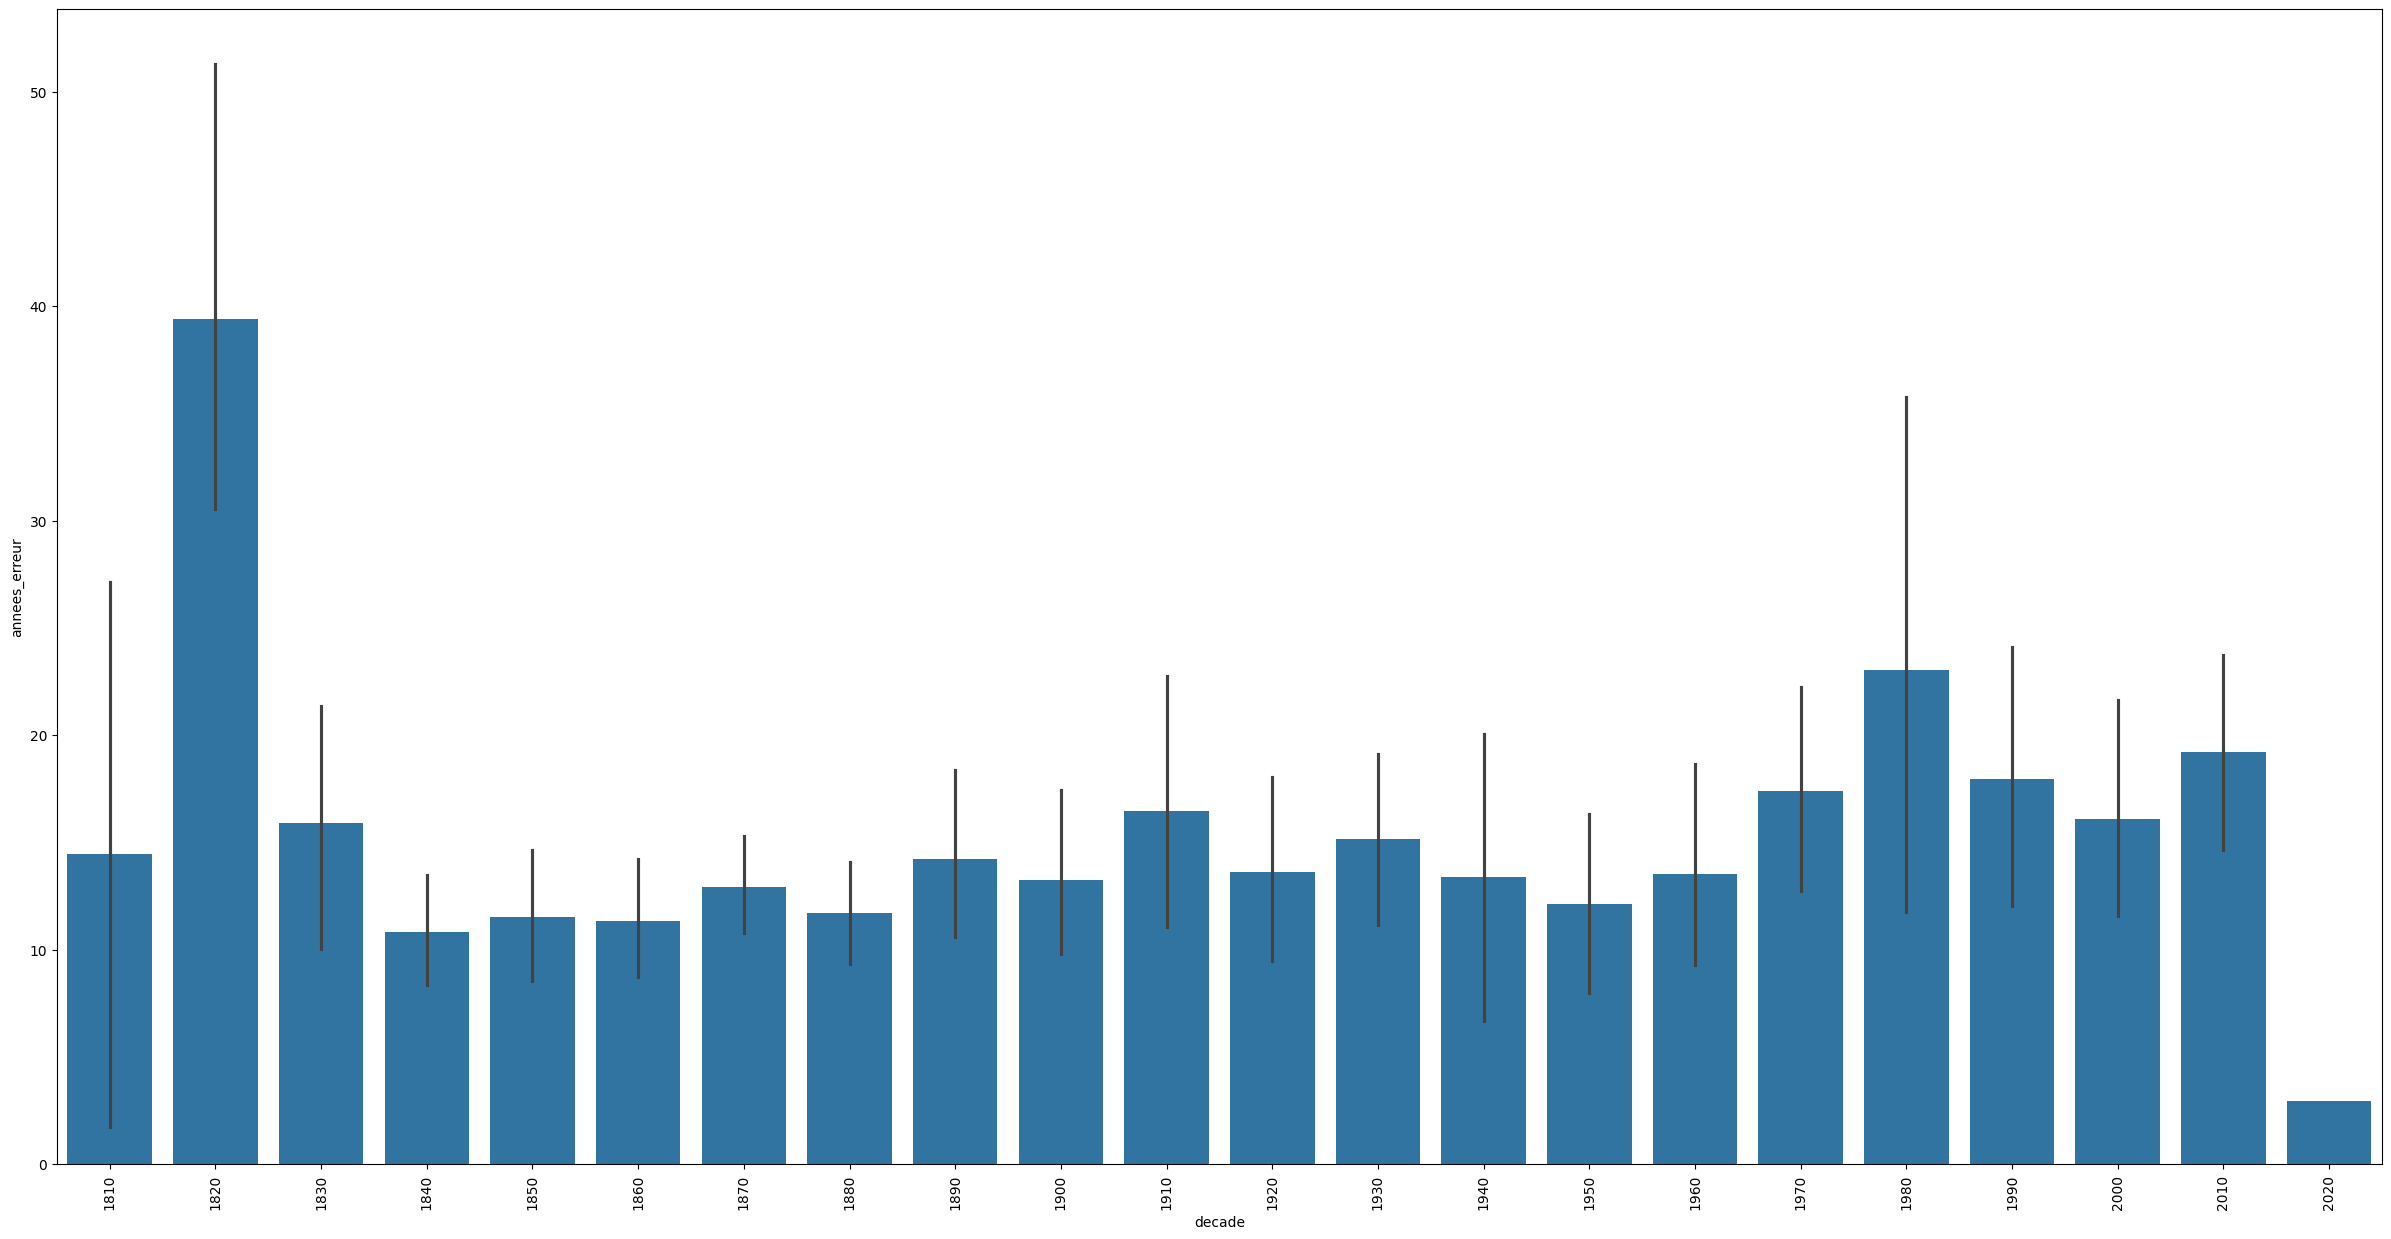

In [77]:
ax, fig = plt.subplots(figsize=(30,15))
sns.barplot(data=df_plot, x='decade', y='annees_erreur')
plt.xticks(rotation = 90)